In [16]:

from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# Import and pre-process data
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
dataset = fetch_20newsgroups(subset='train', categories=categories)
# Convert text data to document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_features=10, stop_words='english')
X = vectorizer.fit_transform(dataset.data)


In [17]:
X.shape

(2034, 10)

In [18]:
# Define the number of topics
num_topics = 20

In [20]:
import scipy
doc_word_matrix = X
# Hyperparameters
num_documents, num_words = doc_word_matrix.shape
num_topics = 20
alpha = 0.5  # Dirichlet hyperparameter for document-topic distribution
beta = 0.5   # Dirichlet hyperparameter for topic-word distribution
num_iterations = 10

# Initialize variables
doc_topic_counts = np.zeros((num_documents, num_topics)) + alpha
word_topic_counts = np.zeros((num_words, num_topics)) + beta
topic_counts = np.zeros(num_topics) + num_words * beta

# Initialize topic assignments randomly
topic_assignments = np.random.randint(num_topics, size=(num_documents, num_words))

# Collapsed Gibbs Sampling
for iteration in range(num_iterations):
    for doc in range(num_documents):
        for word in range(num_words):
            topic = topic_assignments[doc, word]
            
            # Decrement counts for the current assignment
            doc_topic_counts[doc, topic] -= 1
            word_topic_counts[word, topic] -= 1
            topic_counts[topic] -= 1
            
            # Calculate probabilities with a small constant added to denominators
            p_topic_given_doc = (doc_topic_counts[doc, :] + alpha) / (np.sum(doc_topic_counts[doc, :]) + num_topics * alpha + 1e-10)
            p_word_given_topic = (word_topic_counts[word, :] + beta) / (topic_counts + num_words * beta + 1e-10)
            p_topic = p_topic_given_doc * p_word_given_topic
            p_topic = scipy.special.softmax(p_topic)
            # Sample a new topic
            new_topic = np.random.choice(num_topics, p=p_topic)
            topic_assignments[doc, word] = new_topic
            
            # Increment counts for the new assignment
            doc_topic_counts[doc, new_topic] += 1
            word_topic_counts[word, new_topic] += 1
            topic_counts[new_topic] += 1

# Display the final topic assignments
print("Final Topic Assignments:")
print(topic_assignments)

Final Topic Assignments:
[[ 4  2 13 ... 12 15 16]
 [16  8  2 ... 19  5  6]
 [14  1  1 ... 16 13 12]
 ...
 [ 4 14 14 ... 16 16 14]
 [ 9 10  3 ... 10  7  4]
 [ 2 12 16 ...  1  2  8]]


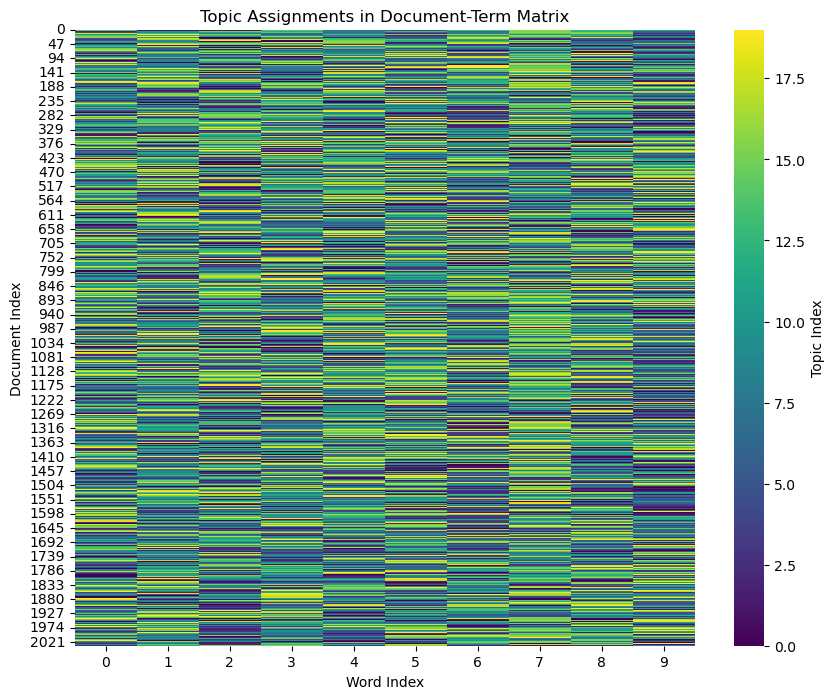

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the final topic assignments using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(topic_assignments, cmap='viridis', cbar_kws={'label': 'Topic Index'})
plt.title('Topic Assignments in Document-Term Matrix')
plt.xlabel('Word Index')
plt.ylabel('Document Index')
plt.show()

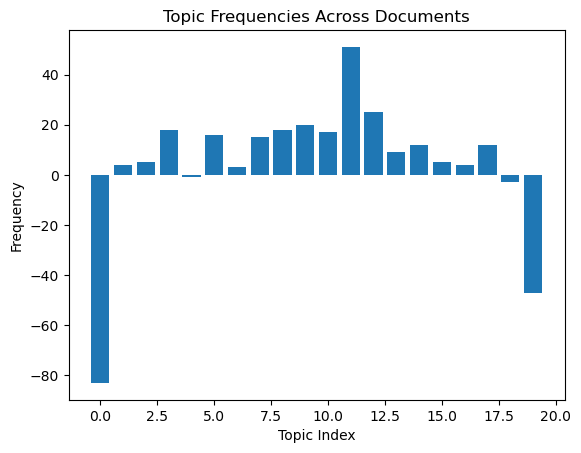

In [29]:
topic_frequencies = np.sum(topic_assignments, axis=0)
plt.bar(range(num_topics), topic_counts)
plt.title('Topic Frequencies Across Documents')
plt.xlabel('Topic Index')
plt.ylabel('Frequency')
plt.show()

In [37]:
pip install wordcloud

     ------------------------------------ 300.0/300.0 kB 688.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


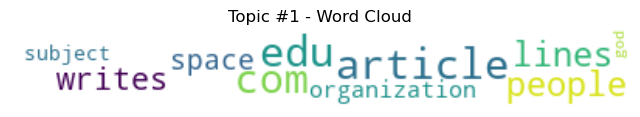

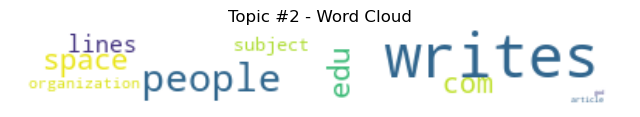

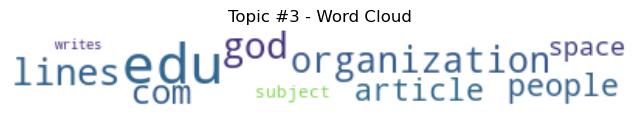

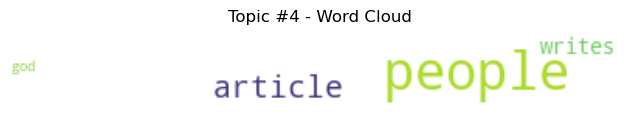

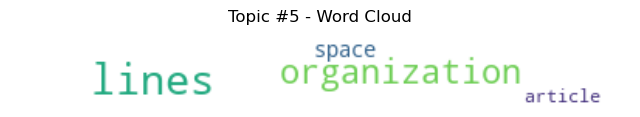

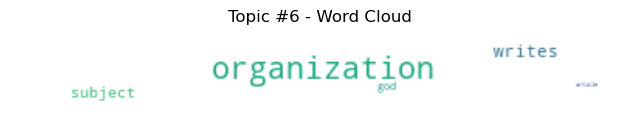

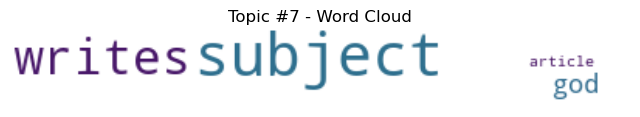

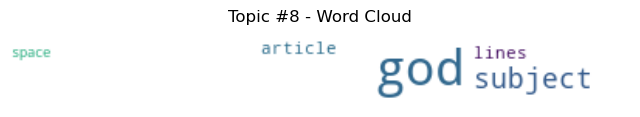

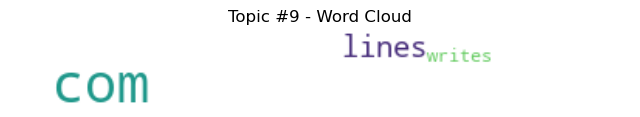

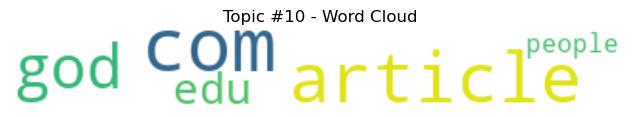

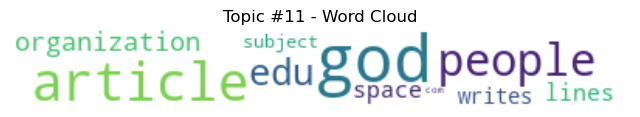

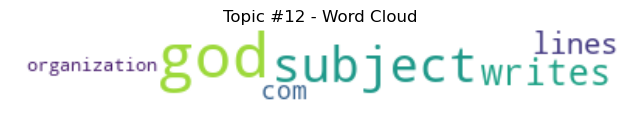

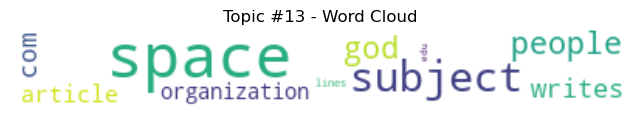

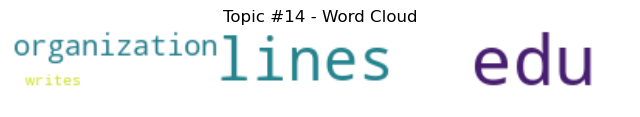

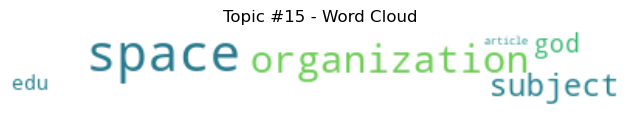

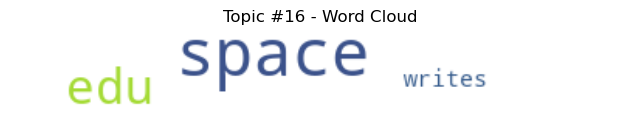

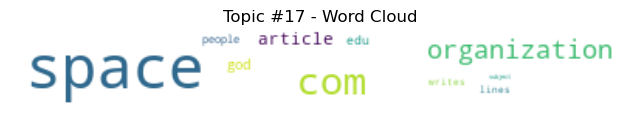

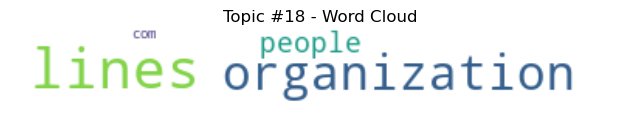

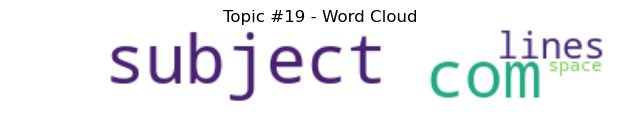

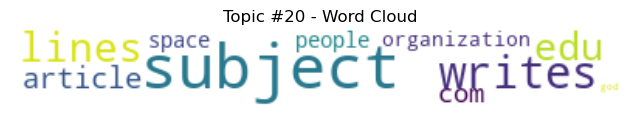

In [43]:
from wordcloud import WordCloud

# Assuming 'vectorizer' is the CountVectorizer used in your code
feature_names = np.array(vectorizer.get_feature_names_out())

for topic_idx in range(num_topics):
    wordcloud = WordCloud(width=400, height=50, background_color='white').generate_from_frequencies(dict(zip(feature_names, word_topic_counts[:, topic_idx])))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic #{topic_idx + 1} - Word Cloud')
    plt.axis('off')
    plt.show()


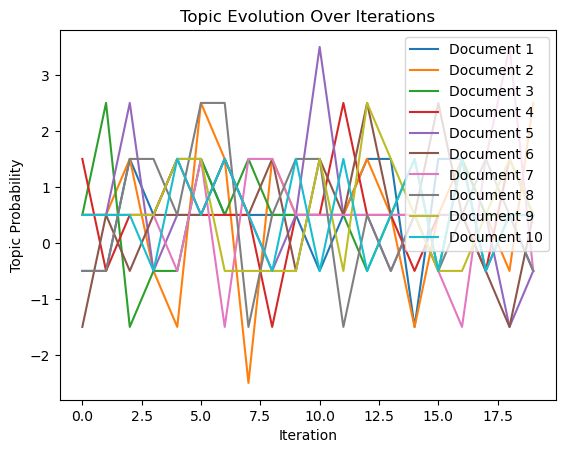

In [35]:
doc_indices_to_plot = [0, 1, 2, 3, 4,5,6,7,8,9]  # Adjust as needed
for doc_index in doc_indices_to_plot:
    plt.plot(doc_topic_counts[doc_index, :], label=f'Document {doc_index + 1}')

plt.title('Topic Evolution Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Topic Probability')
plt.legend()
plt.show()
